In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\Advertising.csv.txt")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### Dropping unwanted column

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(2)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


#### Problem statement
From the above dataframe, we can see 4 columns where the company has spent 230.1 units for TV, 37.8 units for radio and 69.2 units for newspaper to get sales of 22.1 units.
#### Solution
Here we are going to find how many units of the three marketing channels will provide how much sales.

## Statistical inference

In [7]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
data.shape

(200, 4)

In [11]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [12]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

- There are 4 columns in the dataframe whcih ae the marketing channels to gain increased sales
- There are 200 rows and 4 columns in the dataframe
- There are no null values present in the dataframe. But, there is 'zero' in radio marketing strategy and it is considered as value
- From checking the type of data, there is no blank spaces or strings in the columns
- No need of encoding because there are no strings

## Exploratory Data Analysis

There is no need to check for correlation, since there are only 4 columns 

#### Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

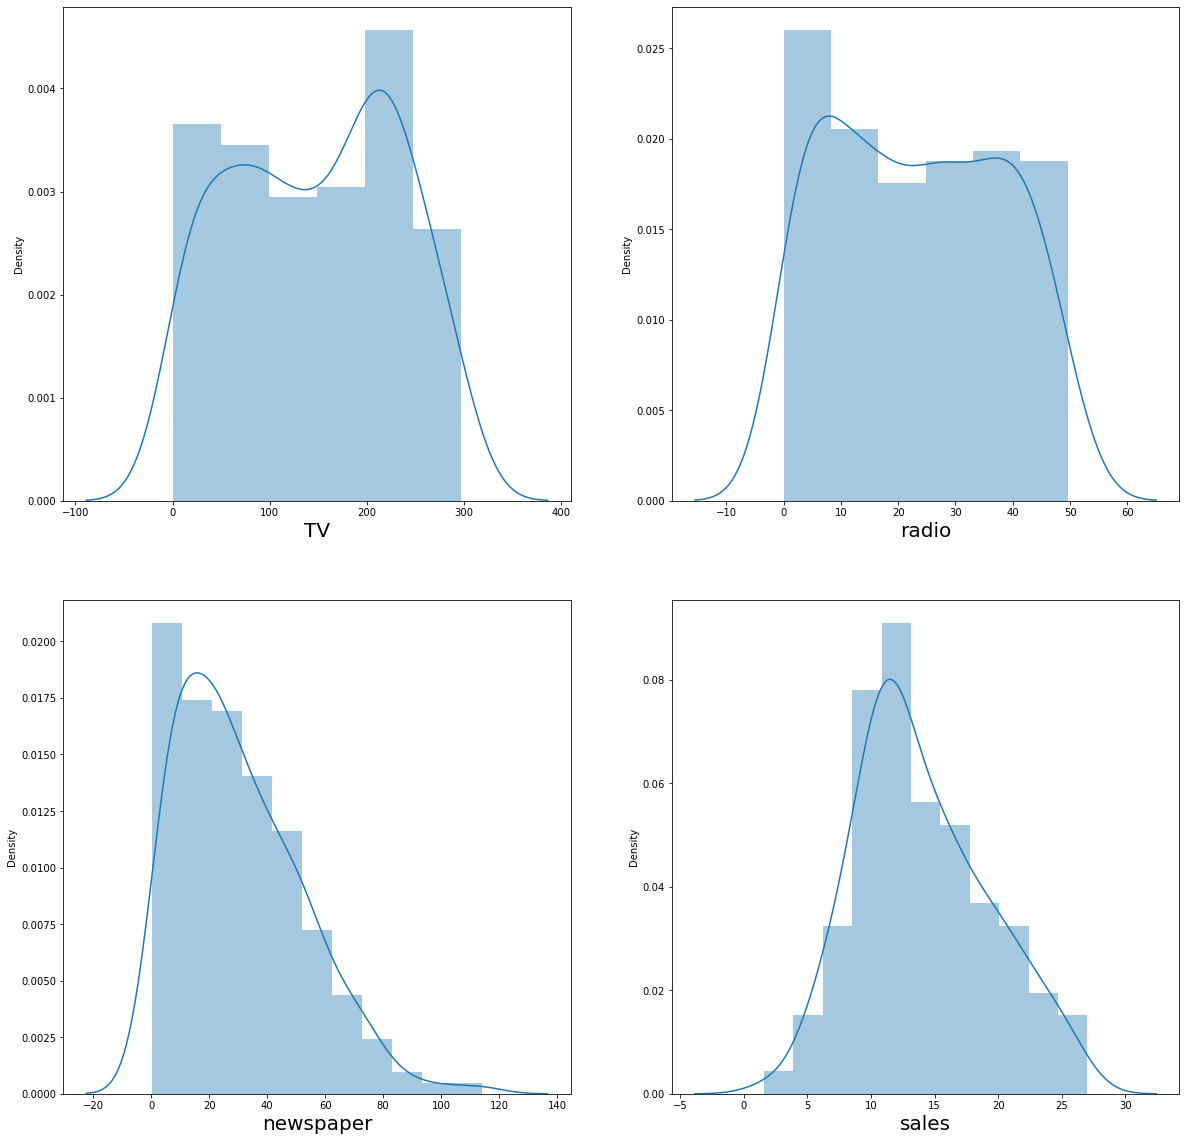

In [15]:
plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <=4:
        ax =  plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

Data distribution looks decent but there are outliers. So, check for outliers after checcking correlation

#### Finding and treating outliers

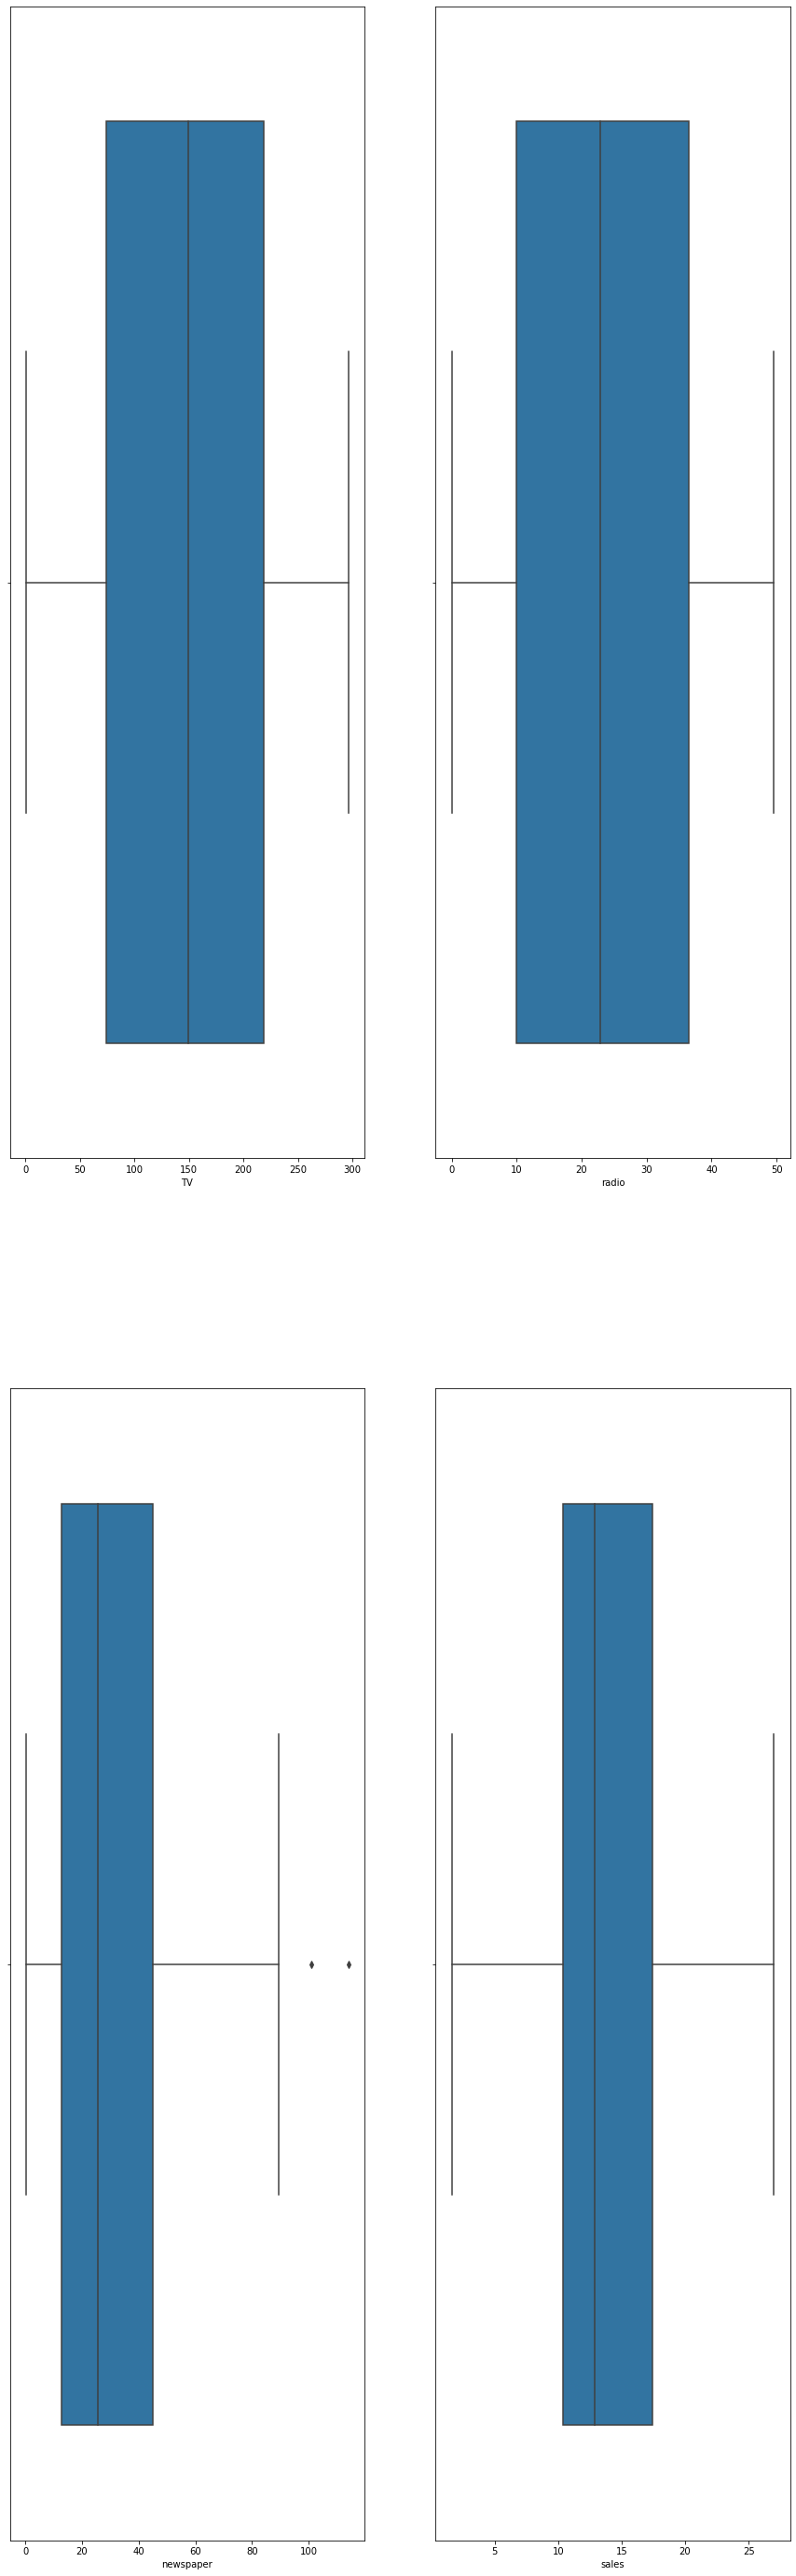

In [17]:
plt.figure(figsize=(15,50))
graph = 1
for column in data:
    if graph<=4:
        ax = plt.subplot(2,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There is outlier in newspaper in higher side

In [18]:
#Find the IQR (Inter Quartile Range)
q1 = data.quantile(0.25)
q3 = data.quantile (0.75)
#IQR
iqr = q3 - q1

np_high = (q3.newspaper + (1.5*iqr.newspaper))
print (np_high)

np_out = np.where(data['newspaper']>np_high)

data=data.drop(data.index[np_out])
print(data.shape)

data.reset_index()

93.625
(198, 4)


,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


Outlier is removed. Only 2 rows removed.

## Model building

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
x = data.drop(columns = ['sales'])
y = data['sales']

#### Relationship between depenedent and independent variable

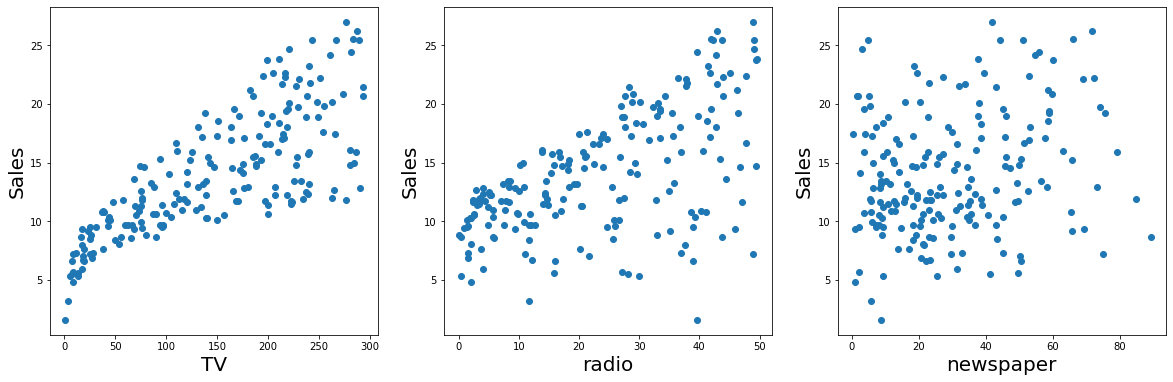

In [56]:
plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Sales', fontsize = 20)
    plotnumber+=1
plt.show()

The distribution looks fairly linear for Tv and radio

#### Finding best random state

In [24]:
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.9506195413176322 on Random State 209


In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 209)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Check with some other models also, to know which model performs better

### Linear regression

In [42]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.9506195413176322
Mean Absolute Error: 1.0295883758894617
Mean Squared Error: 1.6060719507638737


### Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.9609601317163188
Mean Absolute Error: 0.9375
Mean Squared Error: 1.2697499999999997


### Random forest regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.9784369886418119
Mean Absolute Error: 0.6545000000000009
Mean Squared Error: 0.7013249499999994


Random Forest Regressor is the best model for this dataset
- Regression score is 0.97
- Mean Absolute Error is 0.65
- Mean Squared Error is 0.70

## Cross-Validation Score

Checking whether the model is overfitting or underfitting

In [46]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

LR cvs: 0.8853605756683912
DT cvs: 0.9542152357757582
RFR cvs: 0.9758710464912446


## Hyper parameter tuning

Hyper parameter tuning to check whether we can increase the r2_score

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [51]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})
Best Estimator: AdaBoostRegressor(learning_rate=0.4, n_estimators=47)


In [53]:
from sklearn import metrics

ada = AdaBoostRegressor(base_estimator = dt, learning_rate=0.4,n_estimators=47)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.9726052194205473


The accuracy has not changed. So, Random Forest regressor is the best choice of model where we get good R2_score.

## Save the model

In [55]:
import joblib
joblib.dump(rfr,'SalesChannel_Model.pkl')

['SalesChannel_Model.pkl']

Thus the model is saved